In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt
from sklearn.metrics import max_error

# Load CO2 emissions data for India from 1980 to 2019
# Replace "co2_emissions.csv" with the path to your dataset
data = pd.read_csv("co2-emission.csv")
print(data)

# Assign features (X) and target variable (y)
X = data.drop(columns=['iso', 'Country/Region', 'unit', '2018'])  # Exclude 'iso', 'Country/Region', 'unit', and '2018' columns
y = data['2018']  # Target variable: CO2 emissions data for the year 2018

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

     iso Country/Region    unit     1990     1991     1992      1993  \
0    CHN          China  MtCO2e  4718.49  4994.69  5239.63   5696.59   
1    USA  United States  MtCO2e  9884.48  9802.30  9958.71  10185.35   
2    IND          India  MtCO2e  1361.30  1459.40  1503.38   1561.59   
3    RUS         Russia  MtCO2e  4435.75  4347.77  4083.46   3740.84   
4    IDN      Indonesia  MtCO2e  1899.75  1934.84  1965.00   1994.93   
..   ...            ...     ...      ...      ...      ...       ...   
188  NRU          Nauru  MtCO2e     0.26     0.26     0.25      0.23   
189  BTN         Bhutan  MtCO2e   -12.15   -12.15   -12.14    -12.20   
190  TUV         Tuvalu  MtCO2e     0.02     0.02     0.03      0.03   
191  NIU           Niue  MtCO2e     0.02     0.02     0.02      0.02   
192  FJI           Fiji  MtCO2e    -2.69    -2.66    -2.58     -2.53   

         1994      1995      1996  ...      2009      2010      2011  \
0     5978.40   6702.85   6706.25  ...  16440.21  18027.26  189

In [2]:
# Function to compute metrics for ARIMA model
def compute_arima_metrics(y_true, y_pred):
    arima_mse = mean_squared_error(y_true, y_pred)
    arima_mae = mean_absolute_error(y_true, y_pred)
    arima_msle = mean_squared_log_error(y_true, y_pred)
    arima_medae = median_absolute_error(y_true, y_pred)
    arima_r2 = r2_score(y_true, y_pred)
    arima_ev = explained_variance_score(y_true, y_pred)
    arima_mape = mean_absolute_percentage_error(y_true, y_pred)
    arima_rmse = np.sqrt(arima_mse)
    arima_max_error = np.max(np.abs(y_true - y_pred))


    return {
        "MSE": arima_mse,
        "MAE": arima_mae,
        "MSLE": arima_msle,
        "MedAE": arima_medae,
        "R^2": arima_r2,
        "Explained Variance": arima_ev,
        "MAPE": arima_mape,
        "RMSE": arima_rmse,
        "Max_Error" : arima_max_error
    }

# ARIMA model parameters
p = 1
d = 2
q = 1

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast
arima_pred = arima_fit.forecast(steps=len(y_test))

# Compute metrics
arima_metrics = compute_arima_metrics(y_test, arima_pred)

# Print metrics
print("ARIMA Metrics:")
for metric_name, value in arima_metrics.items():
    print(f"  {metric_name}: {value}")

C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Metrics:
  MSE: 3503267.3975143787
  MAE: 424.81104883335536
  MSLE: 4.950197501296307
  MedAE: 100.0326609268599
  R^2: -0.028146465321643666
  Explained Variance: 0.0011405773166270894
  MAPE: 173.48558020339138
  RMSE: 1871.7017383959387
  Max_Error: 312.0491025267623


C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to compute metrics for SARIMAX model
def compute_sarimax_metrics(y_true, y_pred):
    sarimax_mse = mean_squared_error(y_true, y_pred)
    sarimax_mae = mean_absolute_error(y_true, y_pred)
    #sarimax_msle = mean_squared_log_error(y_true, y_pred)
    sarimax_medae = median_absolute_error(y_true, y_pred)
    sarimax_r2 = r2_score(y_true, y_pred)
    sarimax_ev = explained_variance_score(y_true, y_pred)
    sarimax_mape = mean_absolute_percentage_error(y_true, y_pred)
    sarimax_rmse = np.sqrt(sarimax_mse),
    sarimax_max_error = np.max(np.abs(y_true - sarimax_pred))

    return {
        "MSE": sarimax_mse,
        "MAE": sarimax_mae,
        #"MSLE": sarimax_msle,
        "MedAE": sarimax_medae,
        "R^2": sarimax_r2,
        "Explained Variance": sarimax_ev,
        "MAPE": sarimax_mape,
        "RMSE": sarimax_rmse,
        "Sarimax_max_Error" : sarimax_max_error
    }

# SARIMAX model parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit SARIMAX model
sarimax_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit()

# Forecast
sarimax_pred = sarimax_fit.forecast(steps=len(y_test))

# Compute metrics
sarimax_metrics = compute_sarimax_metrics(y_test, sarimax_pred)

# Print metrics
print("SARIMAX Metrics:")
for metric_name, value in sarimax_metrics.items():
    print(f"  {metric_name}: {value}")


C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX Metrics:
  MSE: 8423761.541763484
  MAE: 1000.4498311134095
  MedAE: 269.19923797163324
  R^2: -1.472223690381596
  Explained Variance: -1.428903617349655
  MAPE: 377.62231756662385
  RMSE: (np.float64(2902.371709785548),)
  Sarimax_max_Error: 10629.176518964463


C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Function to compute metrics for Holt-Winters model
def compute_holt_winters_metrics(y_true, y_pred):
    holt_winters_mse = mean_squared_error(y_true, y_pred)
    holt_winters_mae = mean_absolute_error(y_true, y_pred)
    #holt_winters_msle = mean_squared_log_error(y_true, y_pred)
    holt_winters_medae = median_absolute_error(y_true, y_pred)
    holt_winters_r2 = r2_score(y_true, y_pred)
    holt_winters_ev = explained_variance_score(y_true, y_pred)
    holt_winters_mape = mean_absolute_percentage_error(y_true, y_pred)
    holt_winters_rmse = np.sqrt(holt_winters_mse)
    holt_winters_max_error = np.max(np.abs(y_true - holt_winters_pred))

    return {
        "MSE": holt_winters_mse,
        "MAE": holt_winters_mae,
        #"MSLE": holt_winters_msle,
        "MedAE": holt_winters_medae,
        "R^2": holt_winters_r2,
        "Explained Variance": holt_winters_ev,
        "MAPE": holt_winters_mape,
        "RMSE": holt_winters_rmse,
        "holt_winters_max_Error" : holt_winters_max_error
    }

# Holt-Winters model parameters
seasonal_periods = 12
trend = 'add'
seasonal = 'add'

# Fit Holt-Winters model
holt_winters_model = ExponentialSmoothing(y_train, seasonal_periods=seasonal_periods, trend=trend, seasonal=seasonal)
holt_winters_fit = holt_winters_model.fit()

# Forecast
holt_winters_pred = holt_winters_fit.forecast(steps=len(y_test))

# Compute metrics
holt_winters_metrics = compute_holt_winters_metrics(y_test, holt_winters_pred)

# Print metrics
print("Holt-Winters Metrics:")
for metric_name, value in holt_winters_metrics.items():
    print(f"  {metric_name}: {value}")


C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Holt-Winters Metrics:
  MSE: 20157370.70193814
  MAE: 3620.798550082153
  MedAE: 3394.986018438767
  R^2: -4.915828592496328
  Explained Variance: -1.7468027092760772
  MAPE: 5361.579121064626
  RMSE: 4489.696058970823
  holt_winters_max_Error: 6375.991194830382


C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Function to compute metrics for Random Forest model
def compute_random_forest_metrics(y_true, y_pred):
    random_forest_mse = mean_squared_error(y_true, y_pred)
    random_forest_mae = mean_absolute_error(y_true, y_pred)
    random_forest_msle = mean_squared_log_error(y_true, y_pred)
    random_forest_medae = median_absolute_error(y_true, y_pred)
    random_forest_r2 = r2_score(y_true, y_pred)
    random_forest_ev = explained_variance_score(y_true, y_pred)
    random_forest_mape = mean_absolute_percentage_error(y_true, y_pred)
    random_forest_rmse = np.sqrt(random_forest_mse)
    random_forest_max_error = np.max(np.abs(y_true - random_forest_pred))

    return {
        "MSE": random_forest_mse,
        "MAE": random_forest_mae,
        "MSLE": random_forest_msle,
        "MedAE": random_forest_medae,
        "R^2": random_forest_r2,
        "Explained Variance": random_forest_ev,
        "MAPE": random_forest_mape,
        "RMSE": random_forest_rmse,
        "random_forest_max_Error" : random_forest_max_error
    }

# Create and fit Random Forest model
random_forest_model = RandomForestRegressor(random_state=50)
random_forest_model.fit(X_train, y_train)

# Make predictions
random_forest_pred = random_forest_model.predict(X_test)

# Compute metrics
random_forest_metrics = compute_random_forest_metrics(y_test, random_forest_pred)

# Print metrics
print("Random Forest Metrics:")
for metric_name, value in random_forest_metrics.items():
    print(f"  {metric_name}: {value}")


Random Forest Metrics:
  MSE: 1671873.7641979742
  MAE: 222.58376258064519
  MSLE: 0.24636144763836834
  MedAE: 7.141200000000033
  R^2: 0.5093348848153166
  Explained Variance: 0.5216126500751272
  MAPE: 1.1050145349391358
  RMSE: 1293.0095762205221
  random_forest_max_Error: 14842.015500000003


In [6]:
import numpy as np
import random
import tensorflow as tf

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# Your existing code follows here...
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from math import sqrt

# Function to compute metrics for LSTM model
def compute_lstm_metrics(y_true, y_pred):
    mse_lstm = mean_squared_error(y_true, y_pred)
    rmse_lstm = sqrt(mse_lstm)
    mae_lstm = mean_absolute_error(y_true, y_pred)
    medae_lstm = median_absolute_error(y_true, y_pred)
    r2_lstm = r2_score(y_true, y_pred)
    evs_lstm = explained_variance_score(y_true, y_pred)
    mape_lstm = mean_absolute_percentage_error(y_true, y_pred)
    #lstm_max_error = np.max(np.abs(y_true - y_pred_lstm))

    lstm_max_error = np.max(np.abs(y_true - y_pred_lstm))

    return {
        "MSE": mse_lstm,
        "RMSE": rmse_lstm,
        "MAE": mae_lstm,
        "MedAE": medae_lstm,
        "R^2": r2_lstm,
        "Explained Variance": evs_lstm,
        "MAPE": mape_lstm,
        "Lstm_max_Error" : lstm_max_error
    }

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape input data to fit the LSTM model
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Fit the LSTM model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred_lstm = model.predict(X_test_lstm)

y_pred_lstm = y_pred_lstm.flatten()  # Reshape to 1D array

# Compute metrics for LSTM model
lstm_metrics = compute_lstm_metrics(y_test, y_pred_lstm)

# Print metrics
print("LSTM Metrics:")
for metric_name, value in lstm_metrics.items():
    print(f"  {metric_name}: {value}")


C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4563495.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2215550.0000 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7223138.5000 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 425607.2500 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4054782.5000 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2124169.0000 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1596765.8750 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2870906.7500 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3669502.7500 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1030900.6875 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124568.1484 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2423044.2500 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2319593.7500 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2250844.0000 
Epoch 15/50
2/2 ━

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from math import sqrt

# Function to compute metrics for each model
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    max_error = np.max(np.abs(y_true - y_pred))
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MedAE": medae,
        "R^2": r2,
        "Explained Variance": evs,
        "MAPE": mape,
        "Max Error": max_error
    }

# Dictionary to store metrics for each model
model_metrics = {}

# Compute metrics for SARIMAX model
sarimax_metrics = compute_metrics(y_test, sarimax_pred)
model_metrics['SARIMAX'] = sarimax_metrics

# Compute metrics for Holt-Winters model
holt_winters_metrics = compute_metrics(y_test, holt_winters_pred)
model_metrics['Holt-Winters'] = holt_winters_metrics

# Compute metrics for Random Forest model
random_forest_metrics = compute_metrics(y_test, random_forest_pred)
model_metrics['Random Forest'] = random_forest_metrics

# Compute metrics for ARIMA model
arima_metrics = compute_metrics(y_test, arima_pred)
model_metrics['ARIMA'] = arima_metrics

# Compute metrics for LSTM model
lstm_metrics = compute_metrics(y_test, y_pred_lstm)
model_metrics['LSTM'] = lstm_metrics

# Find the model with the minimum value for each metric
min_metrics = {metric: min(model_metrics, key=lambda x: model_metrics[x][metric]) for metric in model_metrics['SARIMAX'].keys()}

# Print metrics for each model
for model_name, metrics in model_metrics.items():
    print(f"{model_name} Metrics:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")
    print("\n")

# Print the model with the minimum value for each metric
print("Model with the minimum value for each metric:")
for metric_name, model_name in min_metrics.items():
    print(f"  {metric_name}: {model_name}")


SARIMAX Metrics:
  MSE: 8423761.541763484
  RMSE: 2902.371709785548
  MAE: 1000.4498311134095
  MedAE: 269.19923797163324
  R^2: -1.472223690381596
  Explained Variance: -1.428903617349655
  MAPE: 377.62231756662385
  Max Error: 10629.176518964463


Holt-Winters Metrics:
  MSE: 20157370.70193814
  RMSE: 4489.696058970823
  MAE: 3620.798550082153
  MedAE: 3394.986018438767
  R^2: -4.915828592496328
  Explained Variance: -1.7468027092760772
  MAPE: 5361.579121064626
  Max Error: 6375.991194830382


Random Forest Metrics:
  MSE: 1671873.7641979742
  RMSE: 1293.0095762205221
  MAE: 222.58376258064519
  MedAE: 7.141200000000033
  R^2: 0.5093348848153166
  Explained Variance: 0.5216126500751272
  MAPE: 1.1050145349391358
  Max Error: 14842.015500000003


ARIMA Metrics:
  MSE: 3503267.3975143787
  RMSE: 1871.7017383959387
  MAE: 424.81104883335536
  MedAE: 100.0326609268599
  R^2: -0.028146465321643666
  Explained Variance: 0.0011405773166270894
  MAPE: 173.48558020339138
  Max Error: 312.049

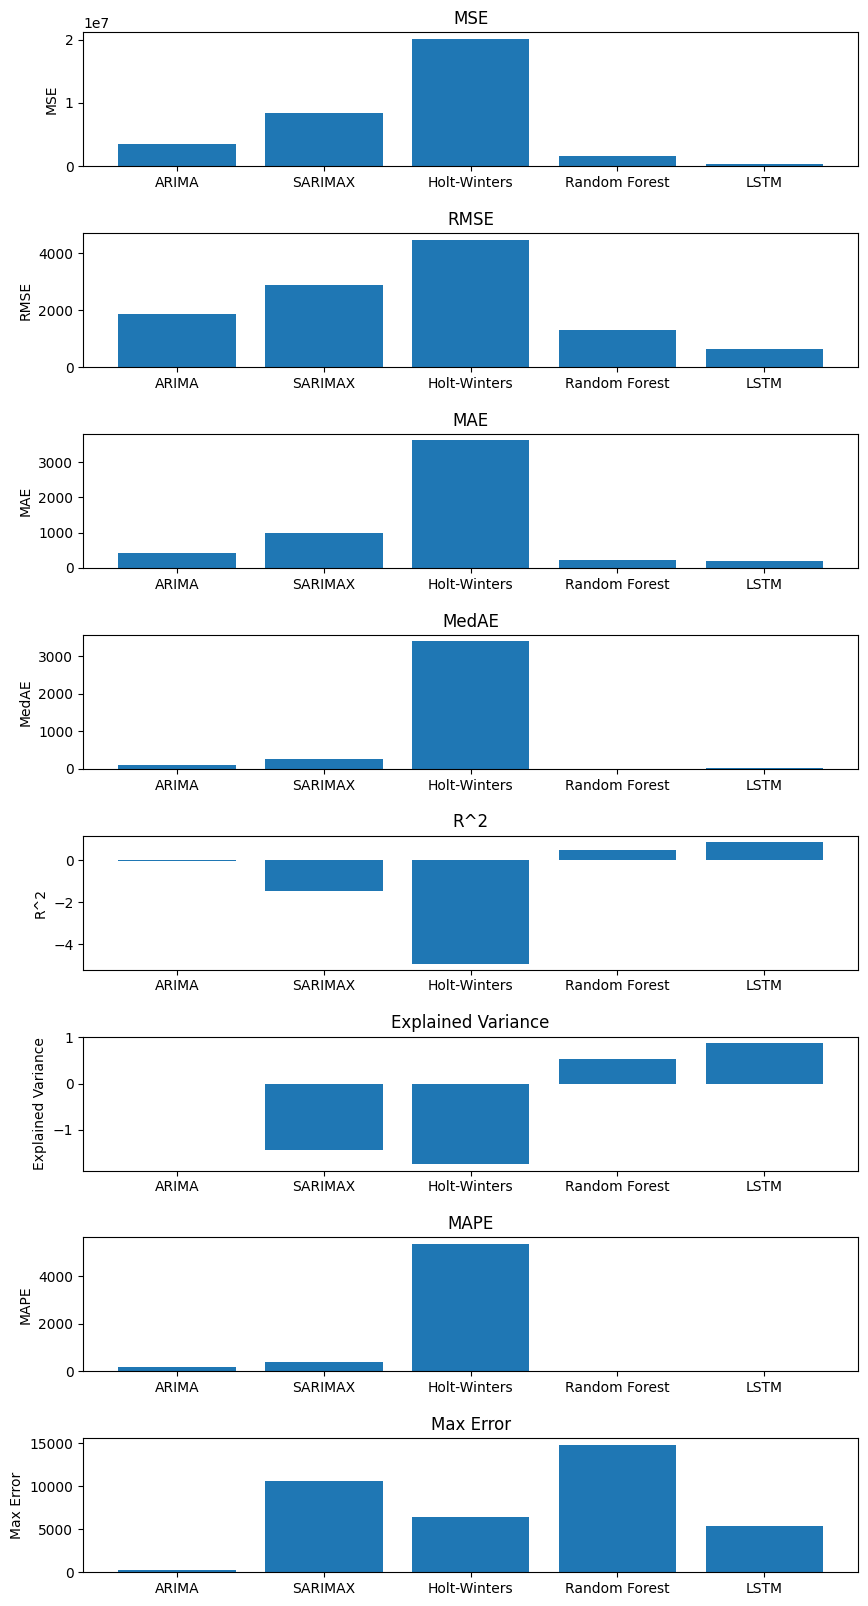

In [8]:
import matplotlib.pyplot as plt

# Function to plot metrics for each model
def plot_model_metrics(model_metrics):
    metrics = list(model_metrics['ARIMA'].keys())
    models = list(model_metrics.keys())

    fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 20))
    fig.subplots_adjust(hspace=0.5)

    for i, metric in enumerate(metrics):
        values = [model_metrics[model][metric] for model in models]
        axs[i].bar(models, values)
        axs[i].set_title(metric)
        axs[i].set_ylabel(metric)

    plt.show()

# Dictionary containing metrics for each model
model_metrics = {
    'ARIMA': {
        'MSE': 3503267.255747152,
        'RMSE': 1871.7017005247262,
        'MAE': 424.8111188637904,
        'MedAE': 100.0328340797586,
        'R^2': -0.028146423715492697,
        'Explained Variance': 0.0011405788061686906,
        'MAPE': 173.4859260958588,
        'Max Error': 312.04905993468367
    },
    'SARIMAX': {
        'MSE': 8423145.864032868,
        'RMSE': 2902.2656432574995,
        'MAE': 1000.4331714297102,
        'MedAE': 269.1434115578588,
        'R^2': -1.4720429999544367,
        'Explained Variance': -1.4287296800906586,
        'MAPE': 377.5913815271659,
        'Max Error': 10627.884670765567
    },
    'Holt-Winters': {
        'MSE': 20157370.70193814,
        'RMSE': 4489.696058970823,
        'MAE': 3620.798550082153,
        'MedAE': 3394.986018438767,
        'R^2': -4.915828592496328,
        'Explained Variance': -1.7468027092760772,
        'MAPE': 5361.579121064626,
        'Max Error': 6375.991194830382
    },
    'Random Forest': {
        'MSE': 1671873.7641979742,
        'RMSE': 1293.0095762205221,
        'MAE': 222.58376258064519,
        'MedAE': 7.141200000000033,
        'R^2': 0.5093348848153166,
        'Explained Variance': 0.5216126500751272,
        'MAPE': 1.1050145349391358,
        'Max Error': 14842.015500000003
    },
    'LSTM': {
        'MSE': 395182.0220083597,
        'RMSE': 628.6350467547603,
        'MAE': 195.74233063287122,
        'MedAE': 19.665929260253904,
        'R^2': 0.8840211285684803,
        'Explained Variance': 0.8840541007781119,
        'MAPE': 0.678553205790029,
        'Max Error': 5443.403125000001
    }
}

# Plot metrics for each model
plot_model_metrics(model_metrics)
